<a href="https://colab.research.google.com/github/saraswatiyangandul20/HealthInsuranceCrossSellPrediction/blob/main/HealthInsuranceCrossSellPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    Health Insurance Cross Sell Prediction



# **Project Summary -**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.
An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.
For example, you may pay a premium of 5000 each year for a health insurance cover of 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **GitHub Link -**

[Github link](https://github.com/saraswatiyangandul20/HealthInsuranceCrossSellPrediction)



# **Problem Statement**


**Our client is an Insurance company that has provided Health Insurance to its customers, now they need our help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.**
**In order to predict whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [69]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd
import missingno as msno
%matplotlib inline  


# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#setting font size throughout the notebook
plt.rcParams.update({'font.size': 14})

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

# Importing libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Importing Machine Learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Importing Classification algorithm metrics
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 14})

### Dataset Loading

In [70]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Load Dataset

# Reading data file 
dir_path = '/content/drive/MyDrive/AlmaBetter/Capstone 3/'
file_name = 'TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
data_file_path = dir_path + file_name
df = pd.read_csv(data_file_path)

### Dataset First View

In [72]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [73]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


### Dataset Rows & Columns count

In [74]:
# Dataset Rows & Columns count
x = df.shape
print(f'The dataset has {x[0]} rows and {x[1]} columns')

The dataset has 381109 rows and 12 columns


### Dataset Information

In [75]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [76]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'Number of duplicated rows are {dup}')

Number of duplicated rows are 0


#### Missing Values/Null Values

In [77]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


<Axes: >

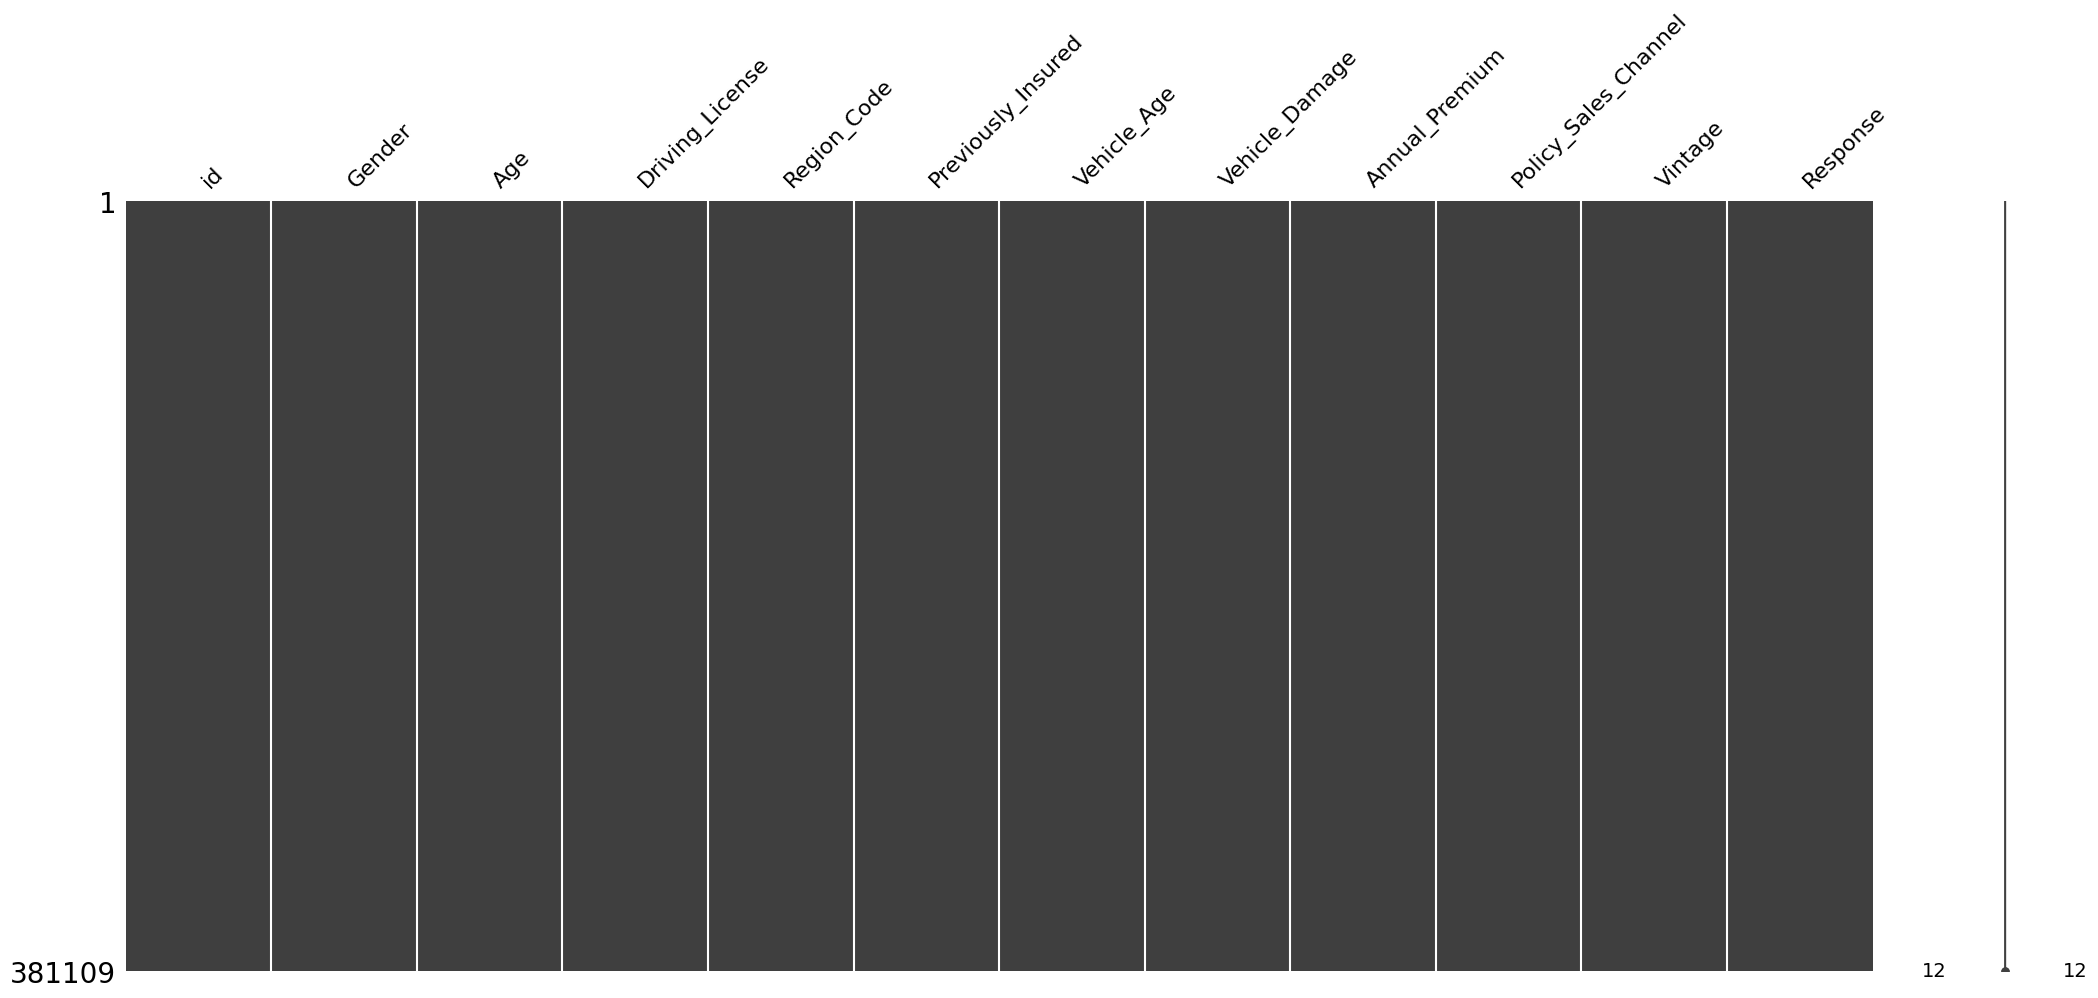

In [78]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

id: indicates the id of the data row

Gender: indicates the gender of the customer

Age: indicates age of the customer

Driving License: indicates if the person is having driving license or not

Region Code: indicates the region code of the customer

Previously Insured: indicates if the customer has perviously insured for policy or not, 1 for yes and 0 for no

Vehicle Age: indicates the age of the vehicle owned by the customer

Vehicle Damage: indicates if the person has perviously damaged the vehicle

Annual Premium: indicates the annual permium for the customer that has to be paid

Policy Sales Channel: indicates the sales channel(Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.)

Vintage: indicates Number of Days, Customer has been associated with the company

Response: indicates if the customer is intersted or not(0 for no and 1 for yes)

## ***2. Understanding Your Variables***

In [79]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [80]:
# Dataset Describe
df.describe(include = 'all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


### Variables Description 

id: indicates the id of the data row

Gender: indicates the gender of the customer

Age: indicates age of the customer

Driving License: indicates if the person is having driving license or not

Region Code: indicates the region code of the customer

Previously Insured: indicates if the customer has perviously insured for policy or not, 1 for yes and 0 for no

Vehicle Age: indicates the age of the vehicle owned by the customer

Vehicle Damage: indicates if the person has perviously damaged the vehicle

Annual Premium: indicates the annual permium for the customer that has to be paid

Policy Sales Channel: indicates the sales channel(Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.)

Vintage: indicates Number of Days, Customer has been associated with the company

Response: indicates if the customer is intersted or not(0 for no and 1 for yes)

### Check Unique Values for each variable.

In [81]:
# Check Unique Values for each variable.
for column in df.columns:
  res = len(df[column].unique())
  print(f"The number of unique variables in {column} column are: {res}")
  if res<=3:
    x = df[column].unique()
    print(f'printing unique values of {column}')
    print('the values are: ', x )

The number of unique variables in id column are: 381109
The number of unique variables in Gender column are: 2
printing unique values of Gender
the values are:  ['Male' 'Female']
The number of unique variables in Age column are: 66
The number of unique variables in Driving_License column are: 2
printing unique values of Driving_License
the values are:  [1 0]
The number of unique variables in Region_Code column are: 53
The number of unique variables in Previously_Insured column are: 2
printing unique values of Previously_Insured
the values are:  [0 1]
The number of unique variables in Vehicle_Age column are: 3
printing unique values of Vehicle_Age
the values are:  ['> 2 Years' '1-2 Year' '< 1 Year']
The number of unique variables in Vehicle_Damage column are: 2
printing unique values of Vehicle_Damage
the values are:  ['Yes' 'No']
The number of unique variables in Annual_Premium column are: 48838
The number of unique variables in Policy_Sales_Channel column are: 155
The number of unique

## 3. ***Data Wrangling***

### Data Wrangling Code

In [82]:
# Write your code to make your dataset analysis ready.
# Having a copy of the dataframe(can be used if any manipulation on the orignal df is done)
copy_df = df.copy()


# dropping the id column
df.drop(['id'],axis=1, inplace=True)

# Converting 'Driving_License' & 'Previously_Insured' from 1,0 to Yes and No using function
# def convert_yes_no(obj):
#   '''this function converts Yes to 1 and No to 0'''
#   if obj == 1:
#     res = 'Yes'
#   else:
#     res = 'No'
#   return res
# df['Driving_License'] = df['Driving_License'].apply(convert_yes_no)
# df['Previously_Insured'] = df['Previously_Insured'].apply(convert_yes_no)

# Converting 'Driving_License' & 'Previously_Insured' from 1,0 to Yes and No using lambda function
df['Driving_License'] = df['Driving_License'].apply(lambda x: 'Yes' if x==1 else "No")
df['Previously_Insured']=df['Previously_Insured'].apply(lambda x: 'Yes' if x==1 else "No")

### What all manipulations have you done and insights you found?

1. Dropped the id column as it was irrelevant

2. Converted the values in categorical columns 'Driving_License' & 'Previously_Insured' from 1 & 0 to Yes and No for better visualization.

3. Coverted 'Region_Code' , 'Annual_Premium' & 'Policy_Sales_Channel' columns from float to int datatype to make it space optimized.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

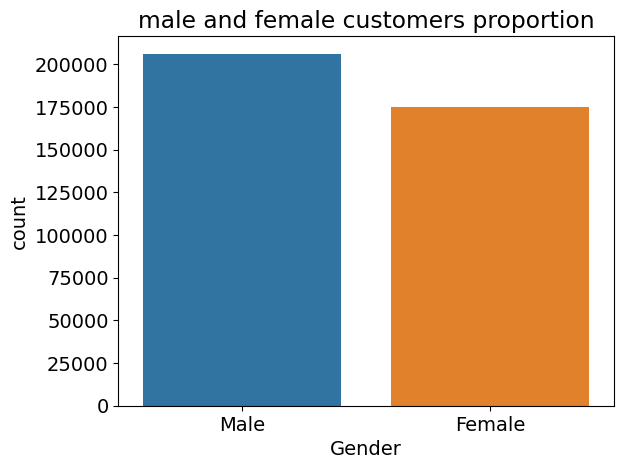

Male      206089
Female    175020
Name: Gender, dtype: int64


In [83]:
# Chart - 1 visualization code
# plotting count plot
sns.countplot(x=df['Gender'], data=df)

# setting chart title
plt.title('male and female customers proportion')

# display chart
plt.show()

# printing the counts for reference
print(df.Gender.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

there are 206089 Male customers and 175020 Female customers

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

this helps us to understand the gender ratio.

#### Chart - 2

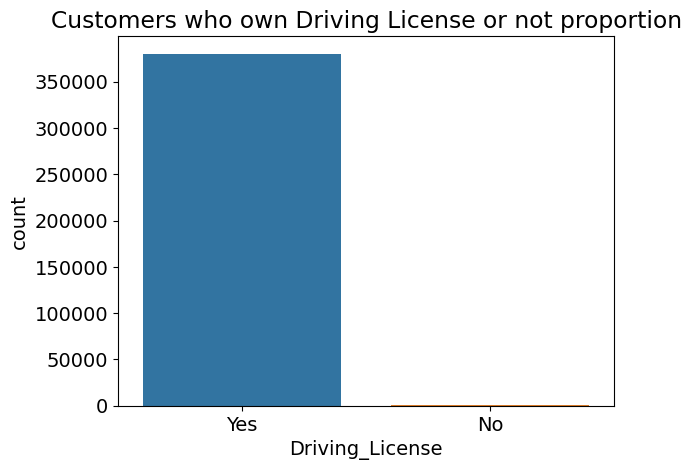

Yes    380297
No        812
Name: Driving_License, dtype: int64


In [84]:
# Chart - 2 visualization code
sns.countplot(x='Driving_License', data=df)

# setting chart title
plt.title('Customers who own Driving License or not proportion')

# display chart
plt.show()

# printing the counts for reference
print(df.Driving_License.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

there are 380297 people who own Driving License and 812 don't

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Its found that most of the people who own driving license owns a car

#### Chart - 3

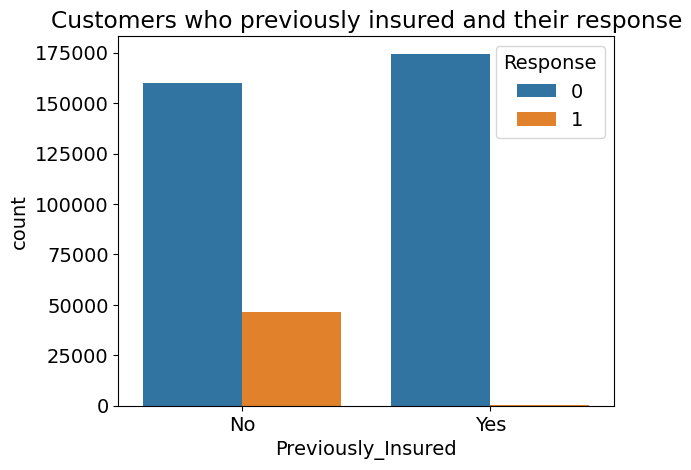

No     206481
Yes    174628
Name: Previously_Insured, dtype: int64


In [85]:
# Chart - 3 visualization code
sns.countplot(x='Previously_Insured', data=df, hue = 'Response')

# setting chart title
plt.title('Customers who previously insured and their response')

# display chart
plt.show()

# printing the counts for reference
print(df.Previously_Insured.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

It is observed that people who have previously not insured are intrested in the policy

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is found that people who have not insured previously are more intrested in buying the ploicy, so it is better to tap the market who previously have not insured

#### Chart - 4
Vehicle age and customer response

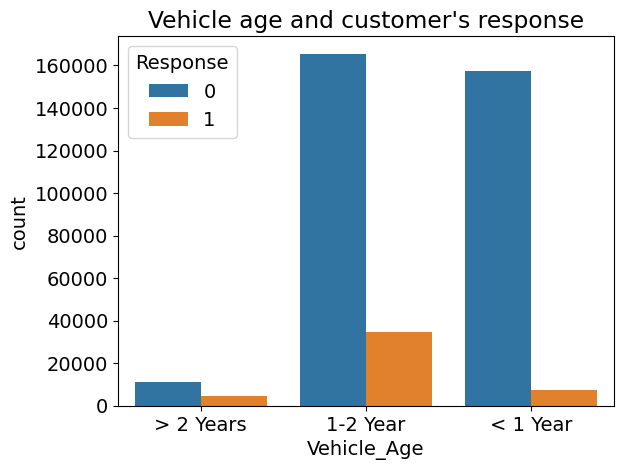

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


In [86]:
# Chart - 4 visualization code

sns.countplot(x='Vehicle_Age', data=df, hue = 'Response')

# setting chart title
plt.title('Vehicle age and customer\'s response')

# display chart
plt.show()

# printing the counts for reference
print(df.Vehicle_Age.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

1. It is observed that most of the people with vehicle age is 1-2 years.
2. ratio wise people with vehicle age greater than 2 years are more intrested in buying policy
3. most of the customers have their vehicle age as 1-2 years

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

as per the ratio it is better to tap the customers whose vehicle age is more than 2 years and we have a good scope in people who own vehicle of age 1-2 years as well.

#### Chart - 5

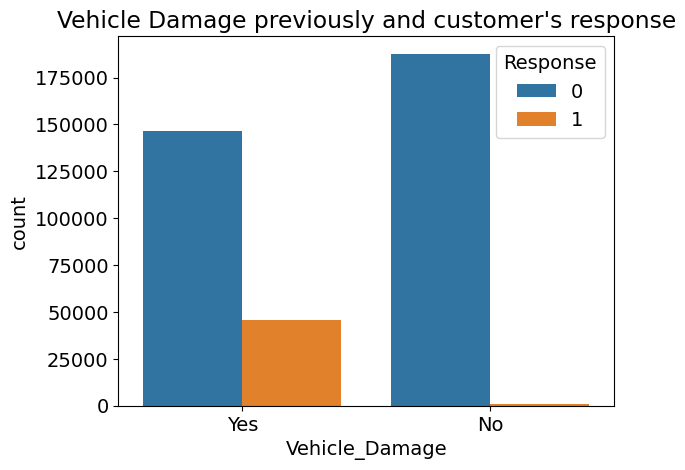

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


In [87]:
# Chart - 5 visualization code
sns.countplot(x='Vehicle_Damage', data=df, hue = 'Response')

# setting chart title
plt.title('Vehicle Damage previously and customer\'s response')

# display chart
plt.show()

# printing the counts for reference
print(df.Vehicle_Damage.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

Its found that previously customers who got their vehicle damaged are more intrested in buying new policy

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. customers who are previously not damaged their car are not much intrested in buying the policy
2. people who have damaged their car previously are more intrested in buying the policy.

#### Chart - 6

In [88]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [89]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [90]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [91]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [92]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [93]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [94]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [95]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [96]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [97]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [98]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [99]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [100]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [101]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [102]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [103]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [104]:
# Expand Contraction

#### 2. Lower Casing

In [105]:
# Lower Casing

#### 3. Removing Punctuations

In [106]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [107]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [108]:
# Remove Stopwords

In [109]:
# Remove White spaces

#### 6. Rephrase Text

In [110]:
# Rephrase Text

#### 7. Tokenization

In [111]:
# Tokenization

#### 8. Text Normalization

In [112]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [113]:
# POS Taging

#### 10. Text Vectorization

In [114]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [115]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [116]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [117]:
# Transform Your data

### 6. Data Scaling

In [118]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [119]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [120]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [121]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [122]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [123]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [124]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [125]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [126]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [127]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [128]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [129]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [130]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [131]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***